# Deep Learning

In [2]:
%matplotlib inline

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
from skimage.transform import resize
from random import sample, seed
import tensorflow as tf
from sklearn.metrics import accuracy_score

In [4]:
#cargamos los datos
ruta_parasited = "C:/Users/Beatriz/Desktop/Máster Data Science/3er trimestre/Machine Learning II/Práctica_aux/cell_images/Parasitized/"
ruta_uninfected = "C:/Users/Beatriz/Desktop/Máster Data Science/3er trimestre/Machine Learning II/Práctica_aux/cell_images/Uninfected/"
parasitized = os.listdir(ruta_parasited) 
uninfected = os.listdir(ruta_uninfected)

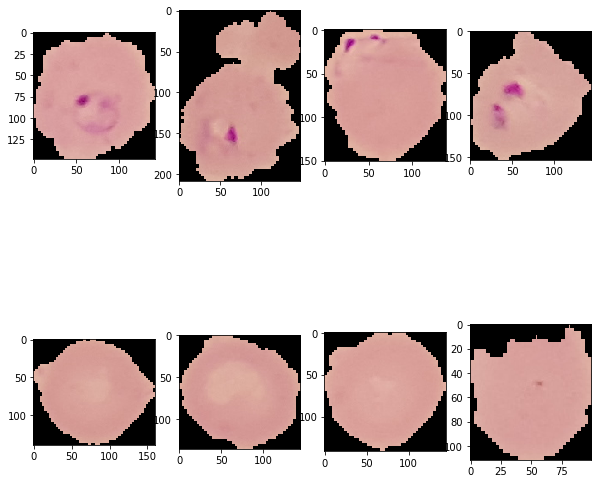

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10,10))
for i in range(4):
    image = parasitized[i]
    imagen1 = plt.imread(ruta_parasited + image)
    ax = axes[0,i]
    ax.imshow(imagen1)

for i in range(4):
    image = uninfected[i]
    imagen1 = plt.imread(ruta_uninfected + image)
    ax = axes[1,i]
    ax.imshow(imagen1)

In [6]:
# sacar los pixel para cada imagen a partir de la ruta
# (filas,columnas,capas RGB)

lista_parasited = []
lista_uninfected = []
tamaño_fila_u = []
tamaño_colum_u = []
tamaño_fila_p = []
tamaño_colum_p = []

for image_p in parasitized:
    imagen1_p = plt.imread(ruta_parasited + image_p)
    lista_parasited.append(imagen1_p)
    tamaño_fila_p.append(imagen1_p.shape[0])
    tamaño_colum_p.append(imagen1_p.shape[1])

for image_u in uninfected:
    imagen1_u = plt.imread(ruta_uninfected + image_u)
    lista_uninfected.append(imagen1_u)
    tamaño_fila_u.append(imagen1_u.shape[0])
    tamaño_colum_u.append(imagen1_u.shape[1])
    

In [7]:
# sacar el máximo número de pixeles por imagen, de filas o columnas
    
tamaño_max_filas = max(max(tamaño_fila_u),max(tamaño_fila_p))
tamaño_max_colum = max(max(tamaño_colum_u),max(tamaño_colum_p))
tamaño_max_total = max(tamaño_max_filas,tamaño_max_colum)

print("Tamaño max filas: ", tamaño_max_filas)
print("Tamaño max columnas: ", tamaño_max_colum)
print("Tamaño max total: ", tamaño_max_total)

Tamaño max filas:  385
Tamaño max columnas:  394
Tamaño max total:  394


In [8]:
# función para redimensionar las imagenes
# def make_square(im, size, fill_color=(0, 0, 0)):
#     x, y = im.size
#     new_im = Image.new('RGB', (size, size), fill_color)
#     new_im.paste(im, (int((size - x) / 2), int((size - y) / 2)))
#     return new_im

In [62]:
# sacar listas de imagenes redimensionadas con pixeles
lista_parasited_copy = lista_parasited[0:1000]
lista_uninfected_copy = lista_uninfected[0:1000]
list_resize_p = []
list_resize_u = []

for image_p in lista_parasited_copy:
    list_resize_p.append(resize(image_p,(tamaño_max_total,tamaño_max_total)))

for image_u in lista_uninfected_copy:
    list_resize_u.append(resize(image_u,(tamaño_max_total,tamaño_max_total)))

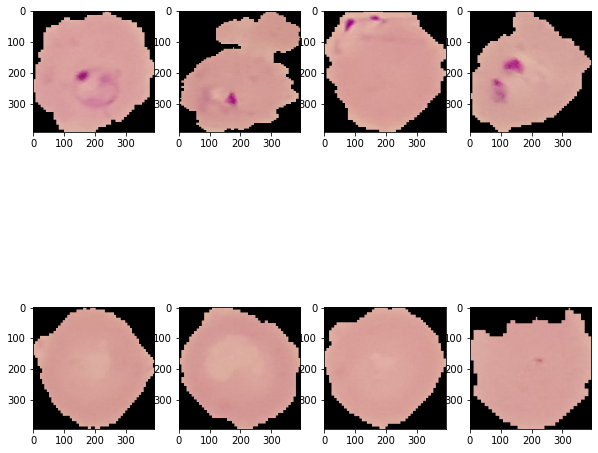

In [63]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10,10))
for i in range(4):
    image = list_resize_p[i]
    ax = axes[0,i]
    ax.imshow(image)

for i in range(4):
    image = list_resize_u[i]
    ax = axes[1,i]
    ax.imshow(image)

In [64]:
# diezmado de las imagenes

resPixel=50
pixeles = np.linspace(0,tamaño_max_total -1,num=resPixel)
#len(pixeles)

# nuevos indices con los pixeles que nos quedamos

indDown=[]
for k_fila in pixeles:
    for k_colum in pixeles:
        indDown.append(int(k_fila)*tamaño_max_total+int(k_colum))

In [65]:
list_red_p = []
list_red_u = []

for image in list_resize_p:
    imagen = np.concatenate(image)
    imagen_1 = imagen[indDown,:]
    list_red_p.append(imagen_1.reshape(resPixel,resPixel,3))

for image in list_resize_u:
    imagen = np.concatenate(image)
    imagen_1 = imagen[indDown,:]
    list_red_u.append(imagen_1.reshape(resPixel,resPixel,3))

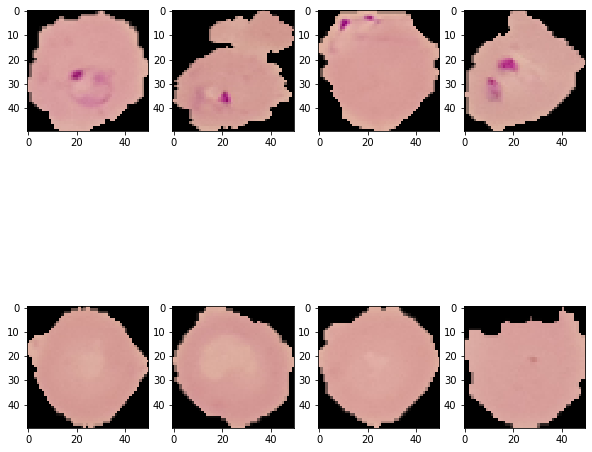

In [66]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10,10))
for i in range(4):
    image = list_red_p[i]
    ax = axes[0,i]
    ax.imshow(image)

for i in range(4):
    image = list_red_u[i]
    ax = axes[1,i]
    ax.imshow(image)

# TRAIN, TEST Y VALIDACION 

In [67]:
# parasited
num_total_p=np.arange(len(list_red_p))
seed(122556) #reproductividad

# 70% para train
indices_train_p = np.array(sample(list(num_total_p), int(0.7*len(num_total_p))))
list_red_p_array = np.array(list_red_p)
XTrain_p = list_red_p_array[indices_train_p]

# # 15% para test
indices_p=np.arange(len(num_total_p))
indices_test_p=np.setdiff1d(indices_p, indices_train_p)

indices_test1_p = np.array(sample(list(indices_test_p), int(0.15*len(num_total_p))))
XTest_p = list_red_p_array[indices_test1_p]

# # 15% para validacion
indices_validacion_p=np.setdiff1d(indices_p, indices_train_p) 
indices_validacion_p=np.setdiff1d(indices_validacion_p,indices_test1_p)
XVal_p=list_red_p_array[indices_validacion_p]

#print(indices_train_p,indices_test1_p,indices_validacion_p)
print(len(XTrain_p),len(XTest_p),len(XVal_p))

700 150 150


In [68]:
# uninfected
num_total_u=np.arange(len(list_red_u))
seed(122556) #reproductividad

# 70% para train
indices_train_u = np.array(sample(list(num_total_u), int(0.7*len(num_total_u))))
list_red_u_array = np.array(list_red_u)
XTrain_u = list_red_u_array[indices_train_u]

# # 15% para test
indices_u=np.arange(len(num_total_u))
indices_test_u=np.setdiff1d(indices_u, indices_train_u)

indices_test1_u = np.array(sample(list(indices_test_u), int(0.15*len(num_total_u))))
XTest_u = list_red_u_array[indices_test1_u]

# # 15% para validacion
indices_validacion_u=np.setdiff1d(indices_u, indices_train_u) 
indices_validacion_u=np.setdiff1d(indices_validacion_u,indices_test1_u)
XVal_u=list_red_u_array[indices_validacion_u]

#print(indices_train_u,indices_test1_u,indices_validacion_u)
print(len(XTrain_u),len(XTest_u),len(XVal_u))

700 150 150


In [69]:
# juntamos parasited y uninfected para train
XTrain_previo = np.concatenate((XTrain_p, XTrain_u))
XTrain = []

for i in XTrain_previo:
    XTrain.append(np.concatenate(i))

XTrain = np.array(XTrain)

####### parasited -> 0, uninfected -> 1
# construimos la etiqueta
YTrain_p = np.zeros(len(XTrain_p),dtype=int)
YTrain_u = np.ones(len(XTrain_u),dtype=int)
YTrain = np.concatenate((YTrain_p, YTrain_u))

print(XTrain.shape)
print(type(XTrain))

print(YTrain.shape)
print(type(YTrain))
print(type(YTrain[0]))

(1400, 2500, 3)
<class 'numpy.ndarray'>
(1400,)
<class 'numpy.ndarray'>
<class 'numpy.int32'>


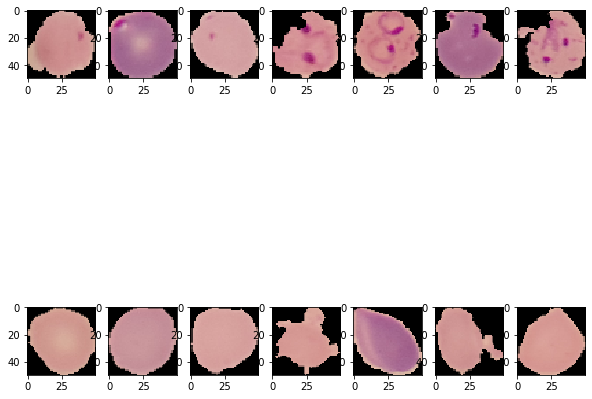

In [71]:
fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(10,10))
for i in range(7):
    image = XTrain_previo[i]
    ax = axes[0,i]
    ax.imshow(image)
    
for i in range(7):
    image = XTrain_previo[i+len(XTrain_p)]
    ax = axes[1,i]
    ax.imshow(image)

In [72]:
# juntamos parasited y uninfected para test
XTest_previo = np.concatenate((XTest_p, XTest_u))
XTest = []

for i in XTest_previo:
    XTest.append(np.concatenate(i))

XTest = np.array(XTest)


####### parasited -> 0, uninfected -> 1
# construimos la etiqueta
YTest_p = np.zeros(len(XTest_p),dtype=int)
YTest_u = np.ones(len(XTest_u),dtype=int)
YTest = np.concatenate((YTest_p, YTest_u))
print(len(YTest))

300


In [73]:
# juntamos parasited y uninfected para validacion
XVal_previo = np.concatenate((XVal_p, XVal_u))
XVal = []

for i in XVal_previo:
    XVal.append(np.concatenate(i))

XVal = np.array(XVal)


####### parasited -> 0, uninfected -> 1
# construimos la etiqueta
YVal_p = np.zeros(len(XVal_p),dtype=int)
YVal_u = np.ones(len(XVal_u),dtype=int)
YVal = np.concatenate((YVal_p, YVal_u))
print(len(YVal))

300


In [74]:
# Crear el vector de etiquetas de manera correcta:

# Para train

y_new_train=[]

for i in range(len(YTrain)):

    if YTrain[i] == 0:
        y_new_train.append([1,0])
    else:
        y_new_train.append([0,1])

        
y_new_train = np.array(y_new_train) 
print(y_new_train.shape)

# Para Test

y_new_test=[]

for i in range(len(YTest)):

    if YTest[i] == 0:
        y_new_test.append([1,0])
    else:
        y_new_test.append([0,1])

        
y_new_test = np.array(y_new_test) 
print(y_new_test.shape)

# Para train

y_new_val=[]

for i in range(len(YVal)):

    if YVal[i] == 0:
        y_new_val.append([1,0])
    else:
        y_new_val.append([0,1])

        
y_new_val = np.array(y_new_val) 


# print(YTrain, YTest, YVal)
print(y_new_val.shape)

(1400, 2)
(300, 2)
(300, 2)


In [75]:
tf.keras.backend.clear_session()

# Parámetros generales de la red en función de la resolución
N_capas = 3
N_tags = 2
Nepoch=5      # Número de épocas
Nbatch=3     # Número de muestras de cada mini-batch

pDO=0.3        # Probabilidad de dropout

Npix=50    # Número de píxeles por dirección        
Nconv1=3   # Tamaño del filtro convolucional 1 (píxeles)
Nconv2=3   # Tamaño del filtro convolucional 2 (píxeles) 
Nfil1=16   # Número de filtros de la primera etapa
Nfil2=32   # Número de filtros de la segunda etapa
Nneu=512   # Número de neuronas del MLP final

In [80]:
# Se define la estructura básica de la red CNN usando TensorFlow y Keras

tf.keras.backend.clear_session()

model = tf.keras.Sequential(
  [
      tf.keras.layers.Reshape(input_shape=(Npix*Npix,N_capas), target_shape=(Npix, Npix,N_capas)),
      tf.keras.layers.Conv2D(kernel_size=Nconv1, filters=Nfil1, activation='relu', padding='same'),
      tf.keras.layers.MaxPooling2D((2, 2)),
      tf.keras.layers.Conv2D(kernel_size=Nconv2, filters=Nfil2, activation='relu', padding='same'),
      #tf.keras.layers.MaxPooling2D((2, 2)),
      tf.keras.layers.Flatten(), #capa para ajustar el numero de elementos
      tf.keras.layers.Dense(Nneu, activation='relu'), #capa de activación
      tf.keras.layers.Dropout(pDO),
      tf.keras.layers.Dense(N_tags, activation='softmax')
  ])
    
    
#model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),
model.compile(optimizer="rmsprop",
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 50, 50, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 50, 50, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 32)        4640      
_________________________________________________________________
flatten (Flatten)            (None, 20000)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               10240512  
_________________________________________________________________
dropout (Dropout)            (None, 512)               0

In [81]:
seed(1223)

model.fit(XTrain,y_new_train,
          batch_size=Nbatch,
          epochs=Nepoch,
          #validation_split = 0,
          #validation_data=(xValD, eVal),
          initial_epoch=0
         )  

oTrain=model.predict(XTrain)
oTest=model.predict(XTest)
        
YTrainE=oTrain.argmax(axis=1)
YTestE=oTest.argmax(axis=1)

PaTrain=100*accuracy_score(YTrain,YTrainE)
PaTest=100*accuracy_score(YTest,YTestE)
        
print('Probabilidad de acierto (Train): %2.2f %%'%(PaTrain))
print('Probabilidad de acierto (Test): %2.2f %%'%(PaTest))

Train on 1400 samples
Epoch 1/5
1400/1400 [==============================] - 41s 29ms/sample - loss: 0.7769 - accuracy: 0.5879
Epoch 2/5
1400/1400 [==============================] - 40s 28ms/sample - loss: 0.5974 - accuracy: 0.7264
Epoch 3/5
1400/1400 [==============================] - 42s 30ms/sample - loss: 0.4683 - accuracy: 0.8079
Epoch 4/5
1400/1400 [==============================] - 39s 28ms/sample - loss: 0.4199 - accuracy: 0.8571
Epoch 5/5
1400/1400 [==============================] - 42s 30ms/sample - loss: 0.3494 - accuracy: 0.8786
Probabilidad de acierto (Train): 82.93 %
Probabilidad de acierto (Test): 73.00 %


In [82]:
# Probamos con los datos de validacion el modelo definitivo

oVal=model.predict(XVal) 
yValE=oVal.argmax(axis=1)
PaVal=100*accuracy_score(YVal,yValE)
print('Probabilidad de acierto (Valida): %2.2f %%'%(PaVal))

Probabilidad de acierto (Valida): 78.33 %


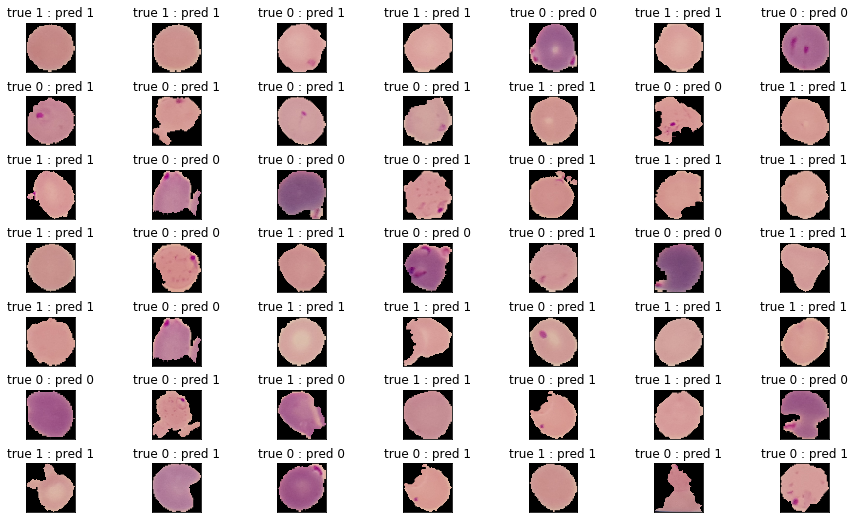

In [97]:
plt.figure(1 , figsize = (15 , 9))
n = 0 
for i in range(49):
    n += 1 
    r = np.random.randint( 0  , XTest.shape[0] , 1)
    plt.subplot(7 , 7 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.imshow(XTest_previo[r[0]])
    plt.title('true {} : pred {}'.format(YTest[r[0]] , YTestE[r[0]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()

In [96]:
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
print('{} \n{} \n{}'.format(confusion_matrix(YTest , YTestE) , 
                           classification_report(YTest , YTestE) , 
                           accuracy_score(YTest , YTestE)))

[[ 70  80]
 [  1 149]] 
              precision    recall  f1-score   support

           0       0.99      0.47      0.63       150
           1       0.65      0.99      0.79       150

    accuracy                           0.73       300
   macro avg       0.82      0.73      0.71       300
weighted avg       0.82      0.73      0.71       300
 
0.73


In [182]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense


In [184]:
model = Sequential()
model.add(Flatten(input_shape=XTrain.shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [185]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 7500)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               1920256   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 1,920,513
Trainable params: 1,920,513
Non-trainable params: 0
_________________________________________________________________


In [186]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [195]:
model.fit(XTrain,YTrain,
          epochs=50,
          batch_size=16)
          #validation_data=(XVal, YVal))

Train on 14 samples
Epoch 1/50
14/14 [==============================] - 1s 74ms/sample - loss: 0.9058 - accuracy: 0.3571
Epoch 2/50
14/14 [==============================] - 0s 2ms/sample - loss: 20.0583 - accuracy: 0.5000
Epoch 3/50
14/14 [==============================] - 0s 2ms/sample - loss: 11.0149 - accuracy: 0.5000
Epoch 4/50
14/14 [==============================] - 0s 2ms/sample - loss: 6.3081 - accuracy: 0.4286
Epoch 5/50
14/14 [==============================] - 0s 2ms/sample - loss: 4.5271 - accuracy: 0.6429
Epoch 6/50
14/14 [==============================] - 0s 2ms/sample - loss: 2.1051 - accuracy: 0.5000
Epoch 7/50
14/14 [==============================] - 0s 3ms/sample - loss: 3.1200 - accuracy: 0.5000
Epoch 8/50
14/14 [==============================] - 0s 3ms/sample - loss: 0.8639 - accuracy: 0.6429
Epoch 9/50
14/14 [==============================] - 0s 2ms/sample - loss: 1.8544 - accuracy: 0.5000
Epoch 10/50
14/14 [==============================] - 0s 6ms/sample - loss: 2.

In [192]:
YTrain.shape

(14, 50, 3)

In [ ]:
bw = Image.fromarray(XTrain[0]).point(lambda x: 0 if x<128 else 255, '1')